In [1]:
import os
import json

import matplotlib.pyplot as plt
import cv2

import pandas as pd
import numpy as np

In [2]:
csv_name1 = 'normal.csv'
csv_name2 = 'pseudo.csv'

In [3]:
output1 = pd.read_csv(os.path.join('/opt/ml',csv_name1))
output1

,PredictionString,image_id
0,7 0.8889930248260498 216.75791931152344 51.973...,test/0000.jpg
1,5 0.6938202381134033 132.2281494140625 0.22078...,test/0001.jpg
2,1 0.8105384707450867 76.7972183227539 272.6375...,test/0002.jpg
3,9 0.7210465669631958 144.7139434814453 259.471...,test/0003.jpg
4,1 0.6025466124216715 195.54220581054688 255.07...,test/0004.jpg
...,...,...
4866,1 0.5896831671396892 293.3543701171875 348.683...,test/4866.jpg
4867,3 0.8107656240463257 414.9770812988281 319.381...,test/4867.jpg
4868,7 0.8208968639373779 115.30994415283203 453.55...,test/4868.jpg
4869,1 0.6532298922538757 842.8405151367188 0.37100...,test/4869.jpg


In [4]:
output2 = pd.read_csv(os.path.join('/opt/ml',csv_name2))
output2

,PredictionString,image_id
0,7 0.9123088717460632 603.2977905273438 519.053...,test/0000.jpg
1,5 0.723380446434021 344.0204772949219 251.1922...,test/0001.jpg
2,1 0.8439706563949585 76.68741607666016 272.706...,test/0002.jpg
3,9 0.7821328043937683 144.92520141601562 258.94...,test/0003.jpg
4,1 0.5706697463989258 194.25279235839844 252.68...,test/0004.jpg
...,...,...
4866,1 0.6291683832804362 293.3092041015625 348.283...,test/4866.jpg
4867,3 0.7681319117546082 414.87139892578125 318.85...,test/4867.jpg
4868,7 0.845762312412262 115.48208618164062 453.281...,test/4868.jpg
4869,1 0.6728663444519043 842.2212524414062 0.37093...,test/4869.jpg


In [5]:
classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
            "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

colors = ((255,255,255), (0,0,255), (0,0,122), (0,255,0), (0,122,0), 
            (255,0,0), (122,122,0), (122,0,0), (122,122,122), (0,122,122))

data_dir = '/opt/ml/dataset/'

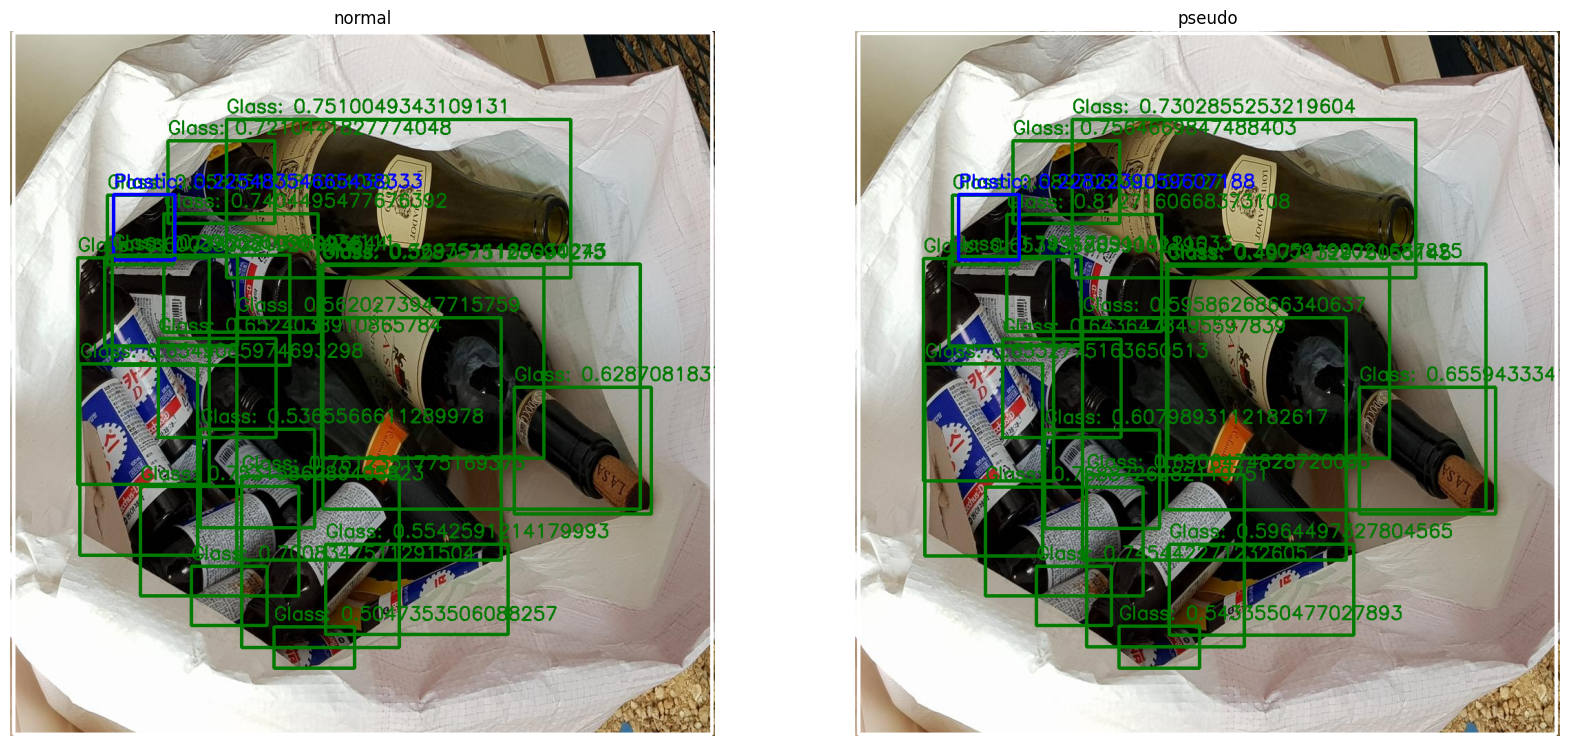

In [6]:
idx = 3638
threshold = 0.2

#print(output['PredictionString'][idx])
o = output1['PredictionString'][idx].split(' ')
image = cv2.imread(os.path.join('/opt/ml/dataset',output1['image_id'][idx]))

fig, axes = plt.subplots(1,2, figsize=(20,10))

for i in range(len(o)//6):
    id, score, xmin, ymin, xmax, ymax = map(float,o[6*i: 6*(i+1)])
    id, xmin, ymin, xmax, ymax = map(int, [id, xmin, ymin, xmax, ymax])

    if score < threshold:
        continue

    image = cv2.rectangle(image, (xmin,ymin), (xmax,ymax), colors[id], 3)
    cv2.putText(image, f'{classes[id]}: {score}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[id], 2)

axes[0].set_title('normal')
axes[0].plot()
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].axis('off')


o = output2['PredictionString'][idx].split(' ')
image = cv2.imread(os.path.join('/opt/ml/dataset',output2['image_id'][idx]))


for i in range(len(o)//6):
    id, score, xmin, ymin, xmax, ymax = map(float,o[6*i: 6*(i+1)])
    id, xmin, ymin, xmax, ymax = map(int, [id, xmin, ymin, xmax, ymax])

    if score < threshold:
        continue

    image = cv2.rectangle(image, (xmin,ymin), (xmax,ymax), colors[id], 3)
    cv2.putText(image, f'{classes[id]}: {score}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[id], 2)


axes[1].set_title('pseudo')
axes[1].plot()
axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].axis('off')


plt.show()